In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Import Images

In [41]:
path = os.getcwd()

img = cv2.imread(f'{path}/key_16_17.tif', cv2.IMREAD_GRAYSCALE)
imgD = cv2.imread(f'{path}/Key_16_17_D.tif', cv2.IMREAD_GRAYSCALE)
imgL = cv2.imread(f'{path}/Key_16_17_L.tif', cv2.IMREAD_GRAYSCALE)

## Caractérisations de l'image

- Calculez l’histogramme de l’image Key 16 17.
- Décrivez l’allure de l’histogramme obtenu.
- Identifiez les différentes composantes de l’image dans l’histogramme.
- Relevez le profil d’une ligne judicieusement choisie et mettez en évidence, en relation avec l’histogramme, la notion de contraste.

### Fonctions histogrammes

In [42]:
def compute_histogram(image):
    # Compute histogram manually
    histogram = np.zeros(256, dtype=int)  # Initialize array for 256 intensity values

    # Count pixel occurrences
    for pixel_value in image.flatten():  # Flatten the image to a 1D array
        histogram[pixel_value] += 1
    return histogram

import matplotlib.pyplot as plt

def plot_histogram(image, histogram):
    # Create a figure with two subplots: one for the image, one for the histogram
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the image on the left
    ax[0].imshow(image, cmap='gray')
    ax[0].axis('off')  # Turn off the axis for the image
    ax[0].set_title("Grayscale Image")

    # Plot the histogram on the right
    ax[1].bar(range(256), histogram, color='gray', width=1.0)
    ax[1].set_xlabel("Pixel Intensity (0-255)")
    ax[1].set_ylabel("Frequency")
    ax[1].set_title("Grayscale Image Histogram")
    ax[1].set_xlim([0, 255])
    ax[1].grid(axis="y", linestyle="--", alpha=0.5)

    # Show the plots
    plt.tight_layout()
    plt.show()

### Image key_16_17

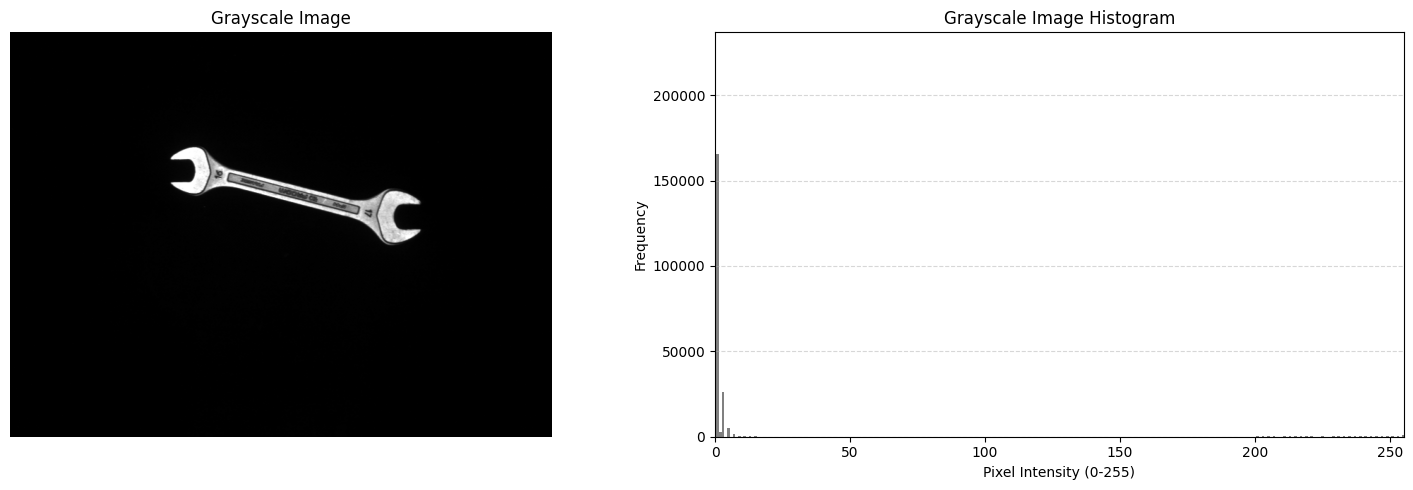

In [43]:
hist = compute_histogram(img)
plot_histogram(img, hist)

Nous pouvons voir sur cet histogramme que les valeurs sont très concentrées vers le 0, ce qui correspond à la couleur noir. Nous pouvons expliquer cela au fond noir de l'image. Les differentes composantes de cette image sont donc le fond noir, et la clé à molette, qui elle est dans différentes nuances de gris.
Nous allons à présent sélectionner une ligne verticale dans l'image afin de la comparer à l'histogramme que nous avons créé.

768


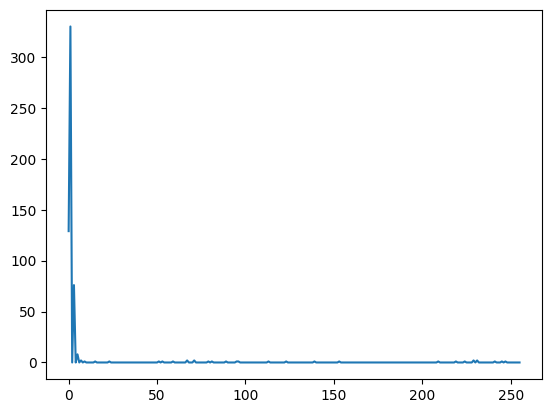

In [47]:
section_img = []
print(len(img[0]))
for i in range(len(img)):
    section_img.append(int(img[i][384]))

section_img = np.array(section_img, dtype=np.uint8)
hist = cv2.calcHist([section_img], [0], None, [256], [0, 256])
plt.plot(hist)

Nous pouvons observer que le bruit est davantage visible que sur le premier histogramme, car nous avons moins de valeurs présentes dans notre tableau. Nous voyons cependant la même tendance que sur l'histogramme réalisé sur l'ensemble de l'image, avec une forme prédominance de valeurs vers le 0, soit vers le noir, et peu de valeurs au delà.

Nous allons à présent analyser les images Key_16_17_D et Key_16_17_L.

- Effectuez les mêmes manipulations pour les images Key 16 17 L et Key 16 17 D.
- Quelles remarques peut-on faire sur les déplacements de l’histogramme sur l’axe des niveaux de gris ?
- Qu’est ce qui peut avoir changé dans les conditions d’acquisition pour donner ce résultat ?

### Image key_16_17D

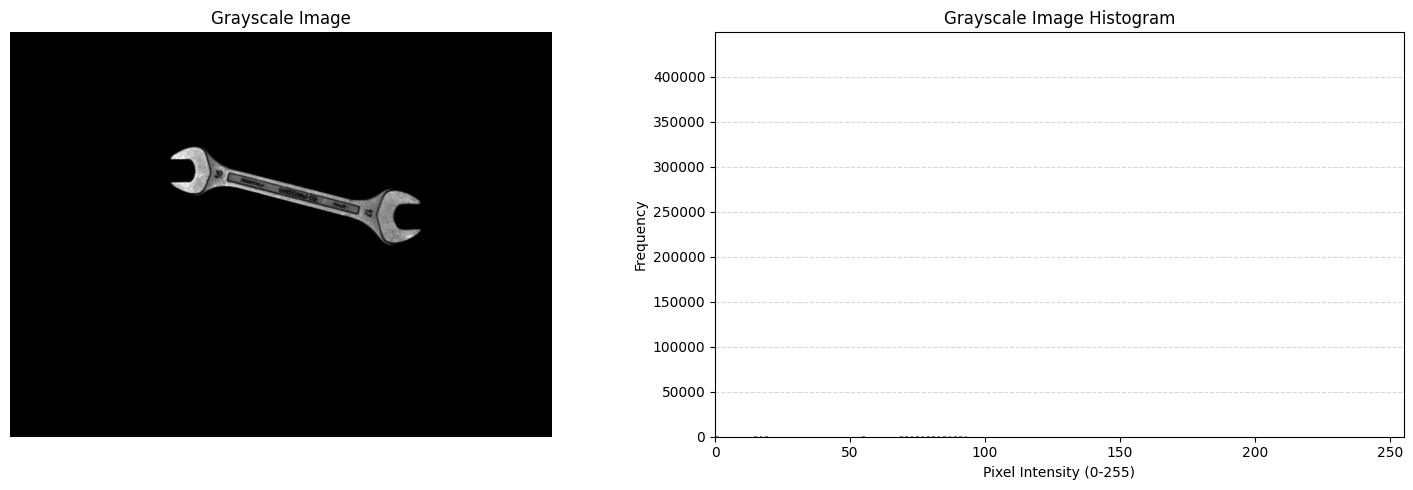

In [48]:
hist = compute_histogram(imgD)
plot_histogram(imgD, hist)

### Image key_16_17L

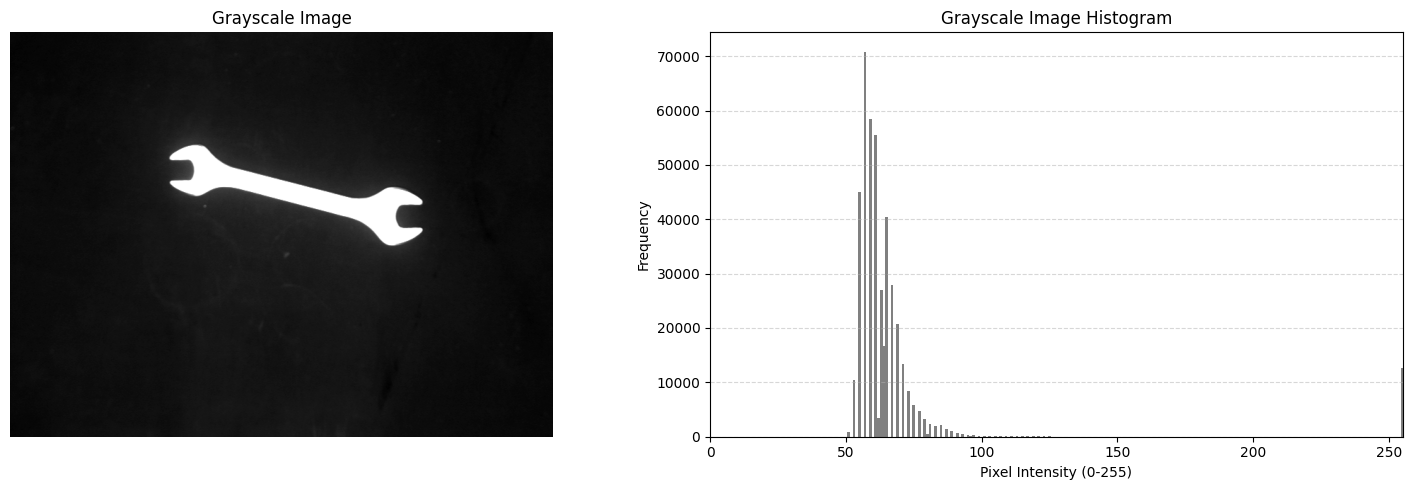

In [49]:
hist = compute_histogram(imgL)
plot_histogram(imgL, hist)

### Conclusion des 3 histogrammes



Nous pouvons voir que l'image "D" perd les valeurs comprises au niveau de 250, et que la clé à molette est plus sombre sur l'image. Sur l'histogramme, nous ne vonyons que peu de valeurs au delà de 0. Il semblerait donc que l'image soit plus sombre que l'image originale, sûrement le résultat d'une photo prise en sous_exposition. Cette imahe contient que peu de niveau de gris, et la majorité des valeurs se trouvent à 0, soit la majorité des pixels pour cette image seront noirs.

L'image L, par contre, a beaucoup de valeurs dans le gris, entre 50 et 100, et également beaucoup de valeurs aux alentours de 256. Nous pouvons donc déterminer que l'image est en général plus claire que l'image de base, et sur la photo, la clé est très blanche, comme si la photo avait été prise en sur-exposition. Nous pouvons cependant observer que beaucoup de pixels se trouvent dans des nuances de gris, contrairement aux deux images précédentes.